In [1]:
# Importing libraries

In [2]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 2.15.0


In [3]:
# Exploring Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


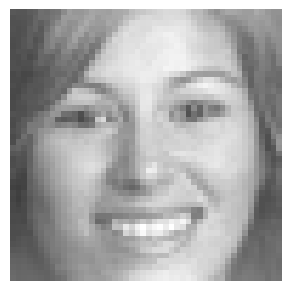

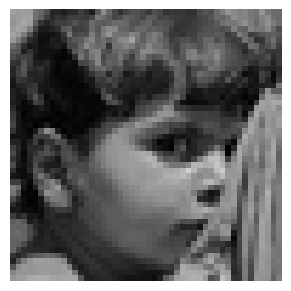

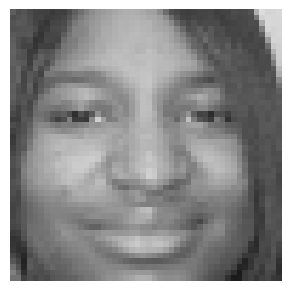

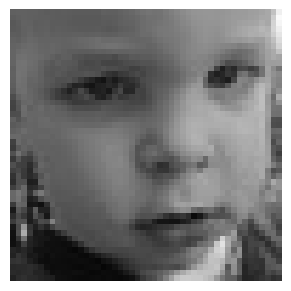

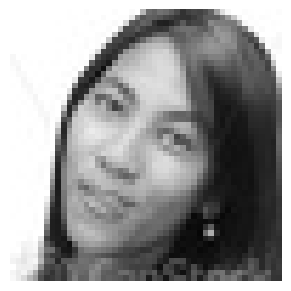

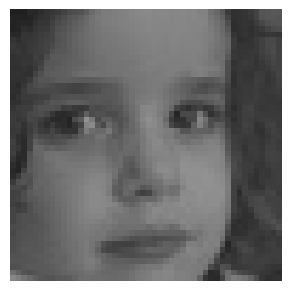

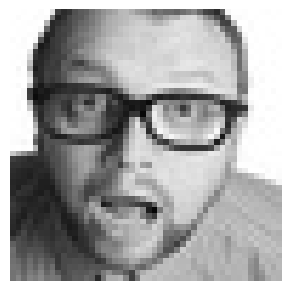

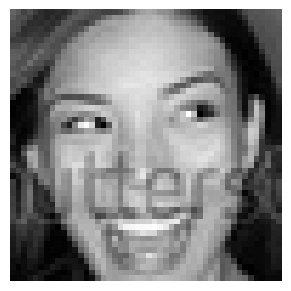

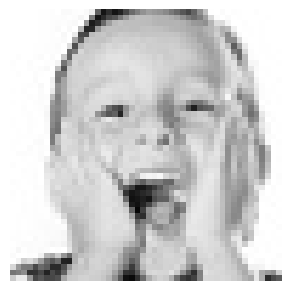

In [5]:
images = glob("/content/drive/MyDrive/Emotion_detection/emotion_detection_course/train/**/**")
for i in range(9):
  image = random.choice(images)
  plt.figure(figsize=(12,12))
  plt.subplot(331+i)
  plt.imshow(cv2.imread(image));plt.axis('off')
plt.show()

In [6]:
# Preparing data for training

In [7]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/Emotion_detection/emotion_detection_course/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/Emotion_detection/emotion_detection_course/test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)


Found 28739 images belonging to 7 classes.
Found 7188 images belonging to 7 classes.


In [8]:
# Defining model

In [9]:
def Convolution(input_tensor , filters, kernel_size):
  x = Conv2D(filters = filters, kernel_size = kernel_size, padding = 'same')(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = Dropout(0.25)(x)

  return x

In [10]:
def Dense_f(input_tensor, nodes):
  x = Dense(nodes)(input_tensor)
  x = BatchNormalization()(x)
  X = Activation('relu')(x)
  x = Dropout(0.25)(x)

  return x

In [11]:
def model_fer(input_shape):
  inputs = Input(input_shape)
  conv_1 = Convolution(inputs, 32, (3,3))
  conv_2 = Convolution(inputs, 64, (5,5))
  conv_3 = Convolution(inputs, 128, (3,3))

  flatten = Flatten()(conv_3)

  dense_1 = Dense_f(flatten, 256)

  output = Dense(7, activation='softmax')(dense_1)
  model = Model(inputs= [inputs], outputs= [output])

  model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])

  return model



In [12]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [13]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
callbacks = [checkpoint]

In [14]:
# Training the model

In [15]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15
449/449 [==============================] - ETA: 0s - loss: 1.8959 - accuracy: 0.3393 
Epoch 1: saving model to model_weights.h5
449/449 [==============================] - 11406s 25s/step - loss: 1.8959 - accuracy: 0.3393 - val_loss: 1.5392 - val_accuracy: 0.4122
Epoch 2/15
449/449 [==============================] - ETA: 0s - loss: 1.5271 - accuracy: 0.4260
Epoch 2: saving model to model_weights.h5
449/449 [==============================] - 630s 1s/step - loss: 1.5271 - accuracy: 0.4260 - val_loss: 1.8133 - val_accuracy: 0.3191
Epoch 3/15
449/449 [==============================] - ETA: 0s - loss: 1.4141 - accuracy: 0.4670
Epoch 3: saving model to model_weights.h5
449/449 [==============================] - 658s 1s/step - loss: 1.4141 - accuracy: 0.4670 - val_loss: 1.5199 - val_accuracy: 0.4294
Epoch 4/15
449/449 [==============================] - ETA: 0s - loss: 1.3468 - accuracy: 0.4932
Epoch 4: saving model to model_weights.h5
449/449 [==============================] - 596s 

In [16]:
# Model Evaluation

In [17]:
model.evaluate(validation_generator)

113/113 [==============================] - 43s 377ms/step - loss: 1.7067 - accuracy: 0.4261


[1.7066872119903564, 0.4261268675327301]

In [23]:
# Plotting Loss

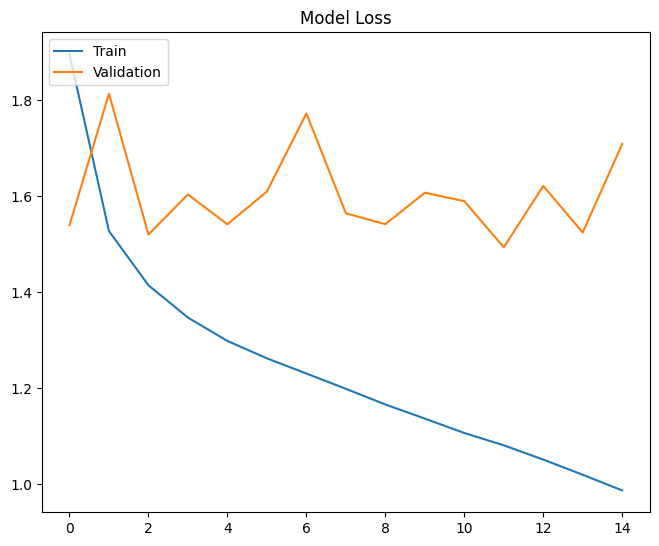

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

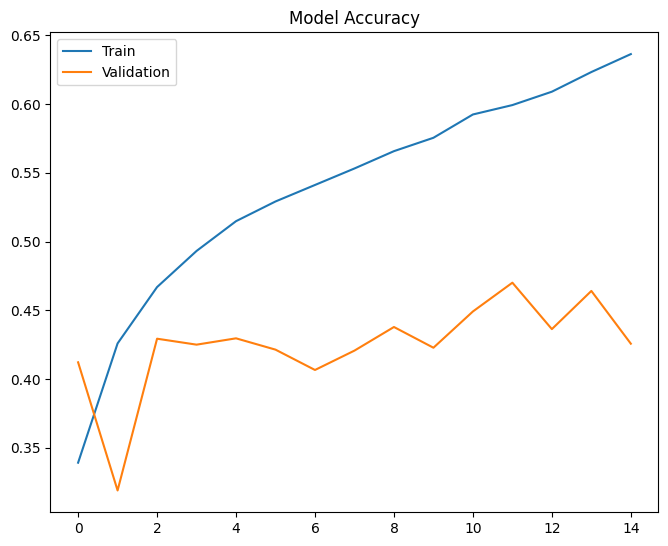

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)


In [21]:
# Saving Model

In [22]:
'''model_json = model.to_json()
with open("model_a.json", "w") as json_file:
  json_file.write(model_json)'''

'model_json = model.to_json()\nwith open("model_a.json", "w") as json_file:\n  json_file.write(model_json)'

In [25]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
  json_file.write(model_json)